# 주식 데이터 모델 생성 및 비교

## 라이브러리

In [40]:
import tensorflow as tf
import numpy as np
import warnings
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import SimpleRNN, Dense

## seed 값 설정

In [41]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 불러오기

In [42]:
df = pd.read_csv('Project.csv', sep=',', encoding = 'euc-kr')
df = df.drop('Silver($)',axis = 1)
df

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,20200731,75628.90,926.271641,26428.32,10745.28,3271.12,170.67,1410.74,1137.32,1191.0
1,20200730,75110.59,897.475847,26313.65,10587.81,3246.22,170.68,1404.82,1138.13,1196.0
2,20200729,75110.45,932.827495,26539.57,10542.94,3258.44,170.56,1401.40,1137.09,1194.0
3,20200728,74342.85,935.967496,26379.28,10402.09,3218.44,171.27,1407.61,1140.26,1199.5
4,20200727,74332.14,942.098478,26584.77,10536.27,3239.41,170.88,1403.60,1136.81,1197.0
...,...,...,...,...,...,...,...,...,...,...
2597,20100806,44660.81,690.243220,10653.56,2288.47,1121.64,171.75,1534.00,1350.28,1163.0
2598,20100805,44870.25,685.811886,10674.98,2293.06,1125.81,172.02,1531.28,1349.94,1165.0
2599,20100804,45009.08,686.874468,10680.43,2303.57,1127.24,172.74,1543.23,1368.42,1170.0
2600,20100803,44425.74,691.629077,10636.38,2283.52,1120.46,172.49,1545.93,1359.20,1168.5


## 종속변수 선정

In [43]:
target = df.Nas
feature = df.drop('Nas', axis = 1)

## 데이터 전처리(0~1값)

In [44]:
scaler = MinMaxScaler()
scale_cols = ['date','Gold','Silver','Dow','Nas','S&P','CNY','EUR','JPY','USD']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,1.00000,1.000000,0.378238,0.840378,0.997480,0.950819,0.329709,0.556616,0.367592,0.673394
1,0.99999,0.985719,0.354153,0.834517,0.979281,0.940173,0.330060,0.543688,0.368800,0.691743
2,0.99998,0.985715,0.383721,0.846064,0.974096,0.945398,0.325851,0.536219,0.367250,0.684404
3,0.99997,0.964565,0.386347,0.837872,0.957818,0.928296,0.350754,0.549781,0.371975,0.704587
4,0.99996,0.964270,0.391475,0.848374,0.973325,0.937262,0.337075,0.541023,0.366832,0.695413
...,...,...,...,...,...,...,...,...,...,...
2597,0.00004,0.146723,0.180824,0.034129,0.020159,0.031818,0.367590,0.825795,0.685078,0.570642
2598,0.00003,0.152494,0.177117,0.035224,0.020690,0.033601,0.377061,0.819855,0.684571,0.577982
2599,0.00002,0.156319,0.178006,0.035502,0.021904,0.034212,0.402315,0.845952,0.712122,0.596330
2600,0.00001,0.140246,0.181983,0.033251,0.019587,0.031313,0.393546,0.851849,0.698376,0.590826


In [45]:
a = ['date','Gold','Silver','Dow','S&P','CNY','EUR','JPY','USD']
feature = df_scaled[a]
target = df_scaled['Nas']

## 종속변수 확인

In [46]:
target

0       0.997480
1       0.979281
2       0.974096
3       0.957818
4       0.973325
          ...   
2597    0.020159
2598    0.020690
2599    0.021904
2600    0.019587
2601    0.020956
Name: Nas, Length: 2602, dtype: float64

## 독립변수 확인

In [47]:
feature

,date,Gold,Silver,Dow,S&P,CNY,EUR,JPY,USD
0,1.00000,1.000000,0.378238,0.840378,0.950819,0.329709,0.556616,0.367592,0.673394
1,0.99999,0.985719,0.354153,0.834517,0.940173,0.330060,0.543688,0.368800,0.691743
2,0.99998,0.985715,0.383721,0.846064,0.945398,0.325851,0.536219,0.367250,0.684404
3,0.99997,0.964565,0.386347,0.837872,0.928296,0.350754,0.549781,0.371975,0.704587
4,0.99996,0.964270,0.391475,0.848374,0.937262,0.337075,0.541023,0.366832,0.695413
...,...,...,...,...,...,...,...,...,...
2597,0.00004,0.146723,0.180824,0.034129,0.031818,0.367590,0.825795,0.685078,0.570642
2598,0.00003,0.152494,0.177117,0.035224,0.033601,0.377061,0.819855,0.684571,0.577982
2599,0.00002,0.156319,0.178006,0.035502,0.034212,0.402315,0.845952,0.712122,0.596330
2600,0.00001,0.140246,0.181983,0.033251,0.031313,0.393546,0.851849,0.698376,0.590826


## Train & Test셋 7:3 분리

In [48]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [49]:
y_test = y_test.reset_index(drop=True)

## 다중 선형 회귀 모델 생성

In [50]:
model = Sequential([
    Dense(2602, input_dim=9, activation='relu'),
    Dense(1301, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2602)              26020     
_________________________________________________________________
dense_4 (Dense)              (None, 1301)              3386503   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1302      
Total params: 3,413,825
Trainable params: 3,413,825
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="mse",optimizer="adam")

In [52]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('model/imdb_cnn_best_model.h5', 
                     verbose=1, mode='max', save_best_only=True)

In [53]:
model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=20,
                    verbose=2,callbacks=[mc, es])

Train on 1456 samples, validate on 365 samples
Epoch 1/200

Epoch 00001: val_loss improved from -inf to 0.00052, saving model to model/imdb_cnn_best_model.h5
1456/1456 - 1s - loss: 0.0114 - val_loss: 5.2492e-04
Epoch 2/200

Epoch 00002: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 4.6717e-04 - val_loss: 2.8575e-04
Epoch 3/200

Epoch 00003: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 4.3059e-04 - val_loss: 2.5268e-04
Epoch 4/200

Epoch 00004: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 3.6799e-04 - val_loss: 2.4711e-04
Epoch 5/200

Epoch 00005: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 2.6765e-04 - val_loss: 1.4250e-04
Epoch 6/200

Epoch 00006: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 2.6795e-04 - val_loss: 1.0565e-04
Epoch 7/200

Epoch 00007: val_loss did not improve from 0.00052
1456/1456 - 1s - loss: 2.3107e-04 - val_loss: 1.6229e-04
Epoch 8/200

Epoch 00008: val_loss did not improve from 0.00052

Epoch 67/200

Epoch 00067: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 7.8020e-05 - val_loss: 5.9531e-05
Epoch 68/200

Epoch 00068: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 9.2830e-05 - val_loss: 4.2817e-05
Epoch 69/200

Epoch 00069: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 9.6171e-05 - val_loss: 1.0678e-04
Epoch 70/200

Epoch 00070: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 1.1939e-04 - val_loss: 4.8982e-05
Epoch 71/200

Epoch 00071: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 1.8184e-04 - val_loss: 5.7302e-05
Epoch 72/200

Epoch 00072: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 1.0270e-04 - val_loss: 9.0521e-05
Epoch 73/200

Epoch 00073: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 1.4588e-04 - val_loss: 1.6820e-04
Epoch 74/200

Epoch 00074: val_loss did not improve from 0.00094
1456/1456 - 1s - loss: 6.9389e-05 - val_loss: 6.5342e-05
Epoch 75/200

Epoch 0007

Epoch 134/200

Epoch 00134: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 7.1372e-05 - val_loss: 3.3522e-05
Epoch 135/200

Epoch 00135: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 6.1020e-05 - val_loss: 8.7701e-05
Epoch 136/200

Epoch 00136: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 1.0656e-04 - val_loss: 3.1605e-04
Epoch 137/200

Epoch 00137: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 1.1085e-04 - val_loss: 4.6019e-05
Epoch 138/200

Epoch 00138: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 7.8191e-05 - val_loss: 1.6880e-04
Epoch 139/200

Epoch 00139: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 1.6239e-04 - val_loss: 4.7144e-05
Epoch 140/200

Epoch 00140: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 1.1042e-04 - val_loss: 5.3367e-05
Epoch 141/200

Epoch 00141: val_loss did not improve from 0.00202
1456/1456 - 1s - loss: 9.7481e-05 - val_loss: 8.9482e-05
Epoch 142/200

E

In [54]:
Y_prediction = model.predict(x_test).flatten()
for i in range(500):
    label = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 0.360, 예상가격: 0.368
실제가격: 0.087, 예상가격: 0.089
실제가격: 0.008, 예상가격: 0.006
실제가격: 0.274, 예상가격: 0.284
실제가격: 0.308, 예상가격: 0.315
실제가격: 0.069, 예상가격: 0.071
실제가격: 0.365, 예상가격: 0.368
실제가격: 0.058, 예상가격: 0.059
실제가격: 0.492, 예상가격: 0.501
실제가격: 0.048, 예상가격: 0.045
실제가격: 0.367, 예상가격: 0.369
실제가격: 0.267, 예상가격: 0.269
실제가격: 0.334, 예상가격: 0.340
실제가격: 0.473, 예상가격: 0.473
실제가격: 0.279, 예상가격: 0.287
실제가격: 0.321, 예상가격: 0.329
실제가격: 0.279, 예상가격: 0.289
실제가격: 0.108, 예상가격: 0.108
실제가격: 0.301, 예상가격: 0.309
실제가격: 0.208, 예상가격: 0.213
실제가격: 0.303, 예상가격: 0.316
실제가격: 0.616, 예상가격: 0.625
실제가격: 0.355, 예상가격: 0.354
실제가격: 0.566, 예상가격: 0.568
실제가격: 0.110, 예상가격: 0.117
실제가격: 0.839, 예상가격: 0.833
실제가격: 0.155, 예상가격: 0.160
실제가격: 0.116, 예상가격: 0.119
실제가격: 0.315, 예상가격: 0.318
실제가격: 0.322, 예상가격: 0.334
실제가격: 0.315, 예상가격: 0.315
실제가격: 0.339, 예상가격: 0.337
실제가격: 0.119, 예상가격: 0.123
실제가격: 0.081, 예상가격: 0.084
실제가격: 0.207, 예상가격: 0.215
실제가격: 0.333, 예상가격: 0.338
실제가격: 0.561, 예상가격: 0.576
실제가격: 0.045, 예상가격: 0.038
실제가격: 0.638, 예상가격: 0.630
실제가격: 0.574, 예상가격: 0.579


## 실제값 vs 예측값 비교

In [55]:
pred = model.predict(x_test)

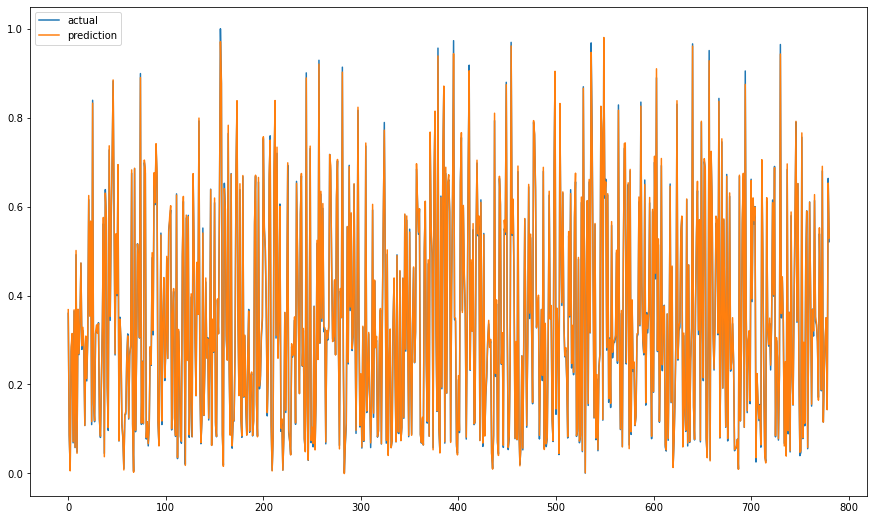

In [56]:
plt.figure(figsize=(15, 9))
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [57]:
y_prediction=model.predict(x_test).flatten()
for i in range(len(y_test)):
    label=y_test[i]
    prediction=y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:,.3f}".format(label, prediction))

실제 가격 : 0.360, 예상 가격 : 0.368
실제 가격 : 0.087, 예상 가격 : 0.089
실제 가격 : 0.008, 예상 가격 : 0.006
실제 가격 : 0.274, 예상 가격 : 0.284
실제 가격 : 0.308, 예상 가격 : 0.315
실제 가격 : 0.069, 예상 가격 : 0.071
실제 가격 : 0.365, 예상 가격 : 0.368
실제 가격 : 0.058, 예상 가격 : 0.059
실제 가격 : 0.492, 예상 가격 : 0.501
실제 가격 : 0.048, 예상 가격 : 0.045
실제 가격 : 0.367, 예상 가격 : 0.369
실제 가격 : 0.267, 예상 가격 : 0.269
실제 가격 : 0.334, 예상 가격 : 0.340
실제 가격 : 0.473, 예상 가격 : 0.473
실제 가격 : 0.279, 예상 가격 : 0.287
실제 가격 : 0.321, 예상 가격 : 0.329
실제 가격 : 0.279, 예상 가격 : 0.289
실제 가격 : 0.108, 예상 가격 : 0.108
실제 가격 : 0.301, 예상 가격 : 0.309
실제 가격 : 0.208, 예상 가격 : 0.213
실제 가격 : 0.303, 예상 가격 : 0.316
실제 가격 : 0.616, 예상 가격 : 0.625
실제 가격 : 0.355, 예상 가격 : 0.354
실제 가격 : 0.566, 예상 가격 : 0.568
실제 가격 : 0.110, 예상 가격 : 0.117
실제 가격 : 0.839, 예상 가격 : 0.833
실제 가격 : 0.155, 예상 가격 : 0.160
실제 가격 : 0.116, 예상 가격 : 0.119
실제 가격 : 0.315, 예상 가격 : 0.318
실제 가격 : 0.322, 예상 가격 : 0.334
실제 가격 : 0.315, 예상 가격 : 0.315
실제 가격 : 0.339, 예상 가격 : 0.337
실제 가격 : 0.119, 예상 가격 : 0.123
실제 가격 : 0.081, 예상 가격 : 0.084
실제 가격 : 0.207,

## 표준편차 값

In [58]:
a = 0.0
for i in range(0,len(y_test)):
    a += (y_test[i]-pred[i])**2
b = a / len(y_test)
c = math.sqrt(b)
print(c)

0.006933915366265831


## RNN 모델 생성

In [60]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [61]:
feature, target = make_dataset(feature,target, 20)

In [62]:
x_feature, x_test, y_feature, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [63]:
x_train, x_valid, y_train, y_valid = train_test_split(x_feature,y_feature, test_size =0.3,
                                                       random_state=0)

In [64]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [67]:
checkpoint = ModelCheckpoint('model/imdb_rnn_best_model.h5', 
                     verbose=1, mode='auto', save_best_only=True)

In [68]:
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=20,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 1264 samples, validate on 543 samples
Epoch 1/200
1240/1264 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00001: val_loss improved from inf to 0.00279, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 1s 1ms/sample - loss: 0.0188 - val_loss: 0.0028
Epoch 2/200
1260/1264 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 00002: val_loss improved from 0.00279 to 0.00126, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 0s 322us/sample - loss: 0.0017 - val_loss: 0.0013
Epoch 3/200
1240/1264 [============================>.] - ETA: 0s - loss: 8.8081e-04
Epoch 00003: val_loss improved from 0.00126 to 0.00089, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 1s 406us/sample - loss: 8.7197e-04 - val_loss: 8.8752e-04
Epoch 4/200
1060/1264 [========================>.....] - ETA: 0s - loss: 6.9251e-04
Epoch 00004: val_loss improved from

1220/1264 [===========================>..] - ETA: 0s - loss: 2.4641e-04
Epoch 00032: val_loss did not improve from 0.00032
1264/1264 [==============================] - 0s 253us/sample - loss: 2.4736e-04 - val_loss: 4.5208e-04
Epoch 33/200
1140/1264 [==========================>...] - ETA: 0s - loss: 2.3178e-04
Epoch 00033: val_loss did not improve from 0.00032
1264/1264 [==============================] - 0s 267us/sample - loss: 2.3533e-04 - val_loss: 4.2877e-04
Epoch 34/200
1220/1264 [===========================>..] - ETA: 0s - loss: 2.4414e-04
Epoch 00034: val_loss improved from 0.00032 to 0.00031, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 0s 270us/sample - loss: 2.4444e-04 - val_loss: 3.1443e-04
Epoch 35/200
1200/1264 [===========================>..] - ETA: 0s - loss: 2.4688e-04
Epoch 00035: val_loss did not improve from 0.00031
1264/1264 [==============================] - 0s 260us/sample - loss: 2.4516e-04 - val_loss: 3.4772e-04
Epoch 3

Epoch 65/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.5127e-04
Epoch 00065: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 251us/sample - loss: 1.5056e-04 - val_loss: 2.5155e-04
Epoch 66/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.6106e-04
Epoch 00066: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 253us/sample - loss: 1.5917e-04 - val_loss: 2.6376e-04
Epoch 67/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.9368e-04
Epoch 00067: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 254us/sample - loss: 1.9394e-04 - val_loss: 2.9554e-04
Epoch 68/200
1220/1264 [===========================>..] - ETA: 0s - loss: 2.0851e-04
Epoch 00068: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 249us/sample - loss: 2.0791e-04 - val_loss: 2.4946e-04
Epoch 69/200
1220/1264 [====================

Epoch 98/200
1200/1264 [===========================>..] - ETA: 0s - loss: 1.3585e-04
Epoch 00098: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 258us/sample - loss: 1.3485e-04 - val_loss: 1.7145e-04
Epoch 99/200
1240/1264 [============================>.] - ETA: 0s - loss: 1.4004e-04
Epoch 00099: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 250us/sample - loss: 1.3926e-04 - val_loss: 3.7435e-04
Epoch 100/200
1160/1264 [==========================>...] - ETA: 0s - loss: 1.5036e-04
Epoch 00100: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 269us/sample - loss: 1.4941e-04 - val_loss: 1.8652e-04
Epoch 101/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.4515e-04
Epoch 00101: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 251us/sample - loss: 1.4850e-04 - val_loss: 2.2516e-04
Epoch 102/200
1020/1264 [=================

1260/1264 [============================>.] - ETA: 0s - loss: 1.5533e-04
Epoch 00131: val_loss did not improve from 0.00014
1264/1264 [==============================] - 0s 252us/sample - loss: 1.5501e-04 - val_loss: 1.4189e-04
Epoch 132/200
1080/1264 [========================>.....] - ETA: 0s - loss: 1.3658e-04
Epoch 00132: val_loss did not improve from 0.00014
1264/1264 [==============================] - 0s 229us/sample - loss: 1.3255e-04 - val_loss: 1.8015e-04
Epoch 133/200
1060/1264 [========================>.....] - ETA: 0s - loss: 1.3662e-04
Epoch 00133: val_loss did not improve from 0.00014
1264/1264 [==============================] - 0s 231us/sample - loss: 1.3434e-04 - val_loss: 2.0847e-04
Epoch 134/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.3568e-04
Epoch 00134: val_loss did not improve from 0.00014
1264/1264 [==============================] - 0s 251us/sample - loss: 1.3541e-04 - val_loss: 1.6738e-04
Epoch 135/200
1240/1264 [============================>

Epoch 165/200
1100/1264 [=========================>....] - ETA: 0s - loss: 1.1634e-04
Epoch 00165: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 229us/sample - loss: 1.1530e-04 - val_loss: 2.3435e-04
Epoch 166/200
1080/1264 [========================>.....] - ETA: 0s - loss: 2.1065e-04
Epoch 00166: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 233us/sample - loss: 2.1719e-04 - val_loss: 1.4676e-04
Epoch 167/200
1040/1264 [=======================>......] - ETA: 0s - loss: 1.3245e-04
Epoch 00167: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 239us/sample - loss: 1.3221e-04 - val_loss: 1.5278e-04
Epoch 168/200
1080/1264 [========================>.....] - ETA: 0s - loss: 1.1021e-04
Epoch 00168: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 231us/sample - loss: 1.1381e-04 - val_loss: 1.3968e-04
Epoch 169/200
1260/1264 [===============

Epoch 00198: val_loss did not improve from 0.00011
1264/1264 [==============================] - 0s 240us/sample - loss: 1.1094e-04 - val_loss: 1.5057e-04
Epoch 199/200
1200/1264 [===========================>..] - ETA: 0s - loss: 1.1692e-04
Epoch 00199: val_loss did not improve from 0.00011
1264/1264 [==============================] - 0s 254us/sample - loss: 1.1842e-04 - val_loss: 1.9815e-04
Epoch 200/200
1120/1264 [=========================>....] - ETA: 0s - loss: 1.4088e-04
Epoch 00200: val_loss did not improve from 0.00011
1264/1264 [==============================] - 0s 229us/sample - loss: 1.4062e-04 - val_loss: 1.3942e-04


## 실제값 vs 예측값 비교

In [69]:
pred = model.predict(x_test)

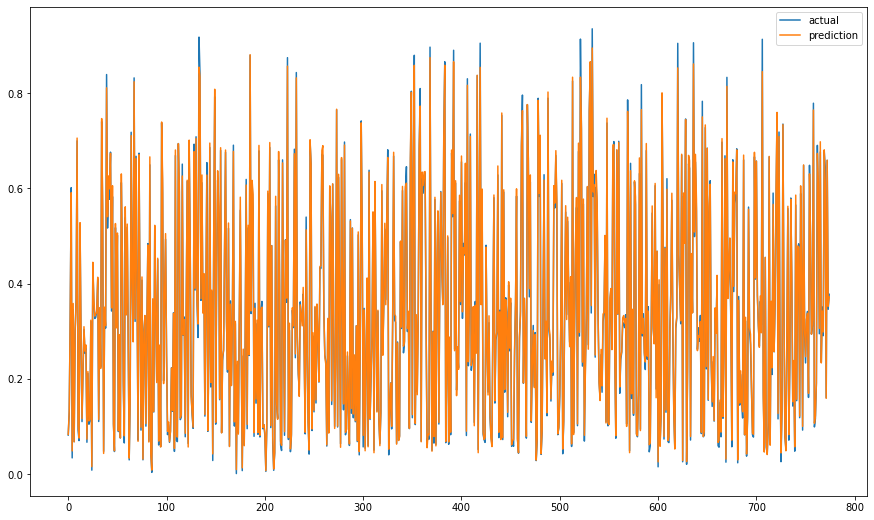

In [70]:
plt.figure(figsize=(15, 9))
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [71]:
y_prediction=model.predict(x_test).flatten()
for i in range(len(y_test)):
    label=y_test[i]
    prediction=y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:,.3f}".format(label, prediction))

실제 가격 : 0.082, 예상 가격 : 0.083
실제 가격 : 0.128, 예상 가격 : 0.133
실제 가격 : 0.329, 예상 가격 : 0.331
실제 가격 : 0.601, 예상 가격 : 0.591
실제 가격 : 0.034, 예상 가격 : 0.048
실제 가격 : 0.345, 예상 가격 : 0.358
실제 가격 : 0.068, 예상 가격 : 0.067
실제 가격 : 0.297, 예상 가격 : 0.302
실제 가격 : 0.369, 예상 가격 : 0.357
실제 가격 : 0.700, 예상 가격 : 0.706
실제 가격 : 0.093, 예상 가격 : 0.102
실제 가격 : 0.070, 예상 가격 : 0.075
실제 가격 : 0.521, 예상 가격 : 0.528
실제 가격 : 0.281, 예상 가격 : 0.292
실제 가격 : 0.110, 예상 가격 : 0.116
실제 가격 : 0.215, 예상 가격 : 0.220
실제 가격 : 0.303, 예상 가격 : 0.309
실제 가격 : 0.254, 예상 가격 : 0.258
실제 가격 : 0.269, 예상 가격 : 0.271
실제 가격 : 0.067, 예상 가격 : 0.073
실제 가격 : 0.211, 예상 가격 : 0.215
실제 가격 : 0.104, 예상 가격 : 0.111
실제 가격 : 0.111, 예상 가격 : 0.115
실제 가격 : 0.321, 예상 가격 : 0.323
실제 가격 : 0.008, 예상 가격 : 0.015
실제 가격 : 0.437, 예상 가격 : 0.445
실제 가격 : 0.362, 예상 가격 : 0.369
실제 가격 : 0.327, 예상 가격 : 0.332
실제 가격 : 0.329, 예상 가격 : 0.336
실제 가격 : 0.344, 예상 가격 : 0.339
실제 가격 : 0.409, 예상 가격 : 0.413
실제 가격 : 0.110, 예상 가격 : 0.114
실제 가격 : 0.348, 예상 가격 : 0.349
실제 가격 : 0.225, 예상 가격 : 0.222
실제 가격 : 0.740,

## 표준편차 값

In [72]:
a = 0.0
for i in range(0,len(y_test)):
    a += (y_test[i]-pred[i])**2
b = a / len(y_test)
c = math.sqrt(b)
print(c)

0.011684673031300849


## Tree모델 생성

In [97]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [98]:
x_train.shape

(1807, 20, 9)

In [99]:
x_test.shape

(775, 20, 9)

In [101]:
x_train = x_train.reshape((1807,20*9))
x_test = x_test.reshape((775,20*9))

In [102]:
x_train.shape

(1807, 180)

In [103]:
x_test.shape

(775, 180)

In [104]:
dt_clf = dt_clf.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'